# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="env/Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [5]:
states.shape

(2, 24)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.0


In [7]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    num_steps = 0
    while True:
        actions = np.random.uniform(-1,1.1, (num_agents, action_size)) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        num_steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))
    print('num steps in episode {}: {}'.format(i, num_steps))
    print('dones at the end of episode {}: {}'.format(i, dones))

Score (max over agents) from episode 1: 0.0
num steps in episode 1: 14
dones at the end of episode 1: [True, True]
Score (max over agents) from episode 2: 0.09000000171363354
num steps in episode 2: 31
dones at the end of episode 2: [True, True]
Score (max over agents) from episode 3: 0.0
num steps in episode 3: 14
dones at the end of episode 3: [True, True]
Score (max over agents) from episode 4: 0.0
num steps in episode 4: 14
dones at the end of episode 4: [True, True]
Score (max over agents) from episode 5: 0.09000000171363354
num steps in episode 5: 31
dones at the end of episode 5: [True, True]


Note that from the output of the above cell we can see that different episodes run for different number of steps. This implies that there are certain terminal states in the env. Also, notice that when a terminal state is reached, both agents are sent a 'done' signal simultaneously. 

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
import autoreload
import numpy as np
import matplotlib.pyplot as plt
import torch
from collections import namedtuple, deque

In [9]:
%load_ext autoreload
from MAD3PG_Agent import Agent

In [10]:
roll_out = 5
assert roll_out >= 1, 'minimum roll_out is 1' # a roll_out of 1 corresponds to a single step 
agent = Agent(roll_out = roll_out, replay_batch = 1024, update_interval = 4,
              lr_actor = 3e-4,  lr_critic = 3e-4, seed = 42,
              vmin = -1, vmax = 1, n_atoms=51)

In [11]:
# function to solve the environment
StepInfo = namedtuple('step_info', field_names = ['states', 'actions', 'rewards',
                                                  'done', 'next_states'] )
def mad3pg(agent = agent, roll_out = roll_out, max_episodes = 2):
    
    #let us first preload the agents buffer with memory of randomly taken steps
    
    # start training the agent
    ep_scores = [] # list of scores for each episode
    scores_window = deque(maxlen = 100)
    for i_episode in range(1, max_episodes+1):
        #reset the env
        env_info = env.reset(train_mode=True)[brain_name] 
        scores = np.zeros(num_agents)
        num_steps = 0 # count the number of steps taken so far
        # reset the experience window at the begining of each episode
        # This keeps the sequence of events in each episode disentangled
        experience_window = deque(maxlen = roll_out)
        for _ in range(roll_out):
            # obtain the current states
            states = env_info.vector_observations 
            # obtain the current actions
            actions = agent.act(states)
            # take next step in the environment
            env_info = env.step(actions)[brain_name]
            # get the rewards
            rewards = env_info.rewards
            # get done
            done = np.any(env_info.local_done)
            # obtain the next_state
            next_states = env_info.vector_observations
            # add reward to score
            scores+=rewards
            # add step_info
            step_info = StepInfo(states, actions, rewards, done, next_states)
            # push step_info into experience_window
            experience_window.append(step_info)
            if done:
                final_score = np.max(scores)
                ep_scores.append(final_score)
                scores_window.append(final_score)
                break
        
        # format the memories in the experience window so as to store them in the replay buffer
        memory = format_memory(experience_window, roll_out)
        # agent takes a step
        agent.step(memory)
        while not done:
            # obtain the current states
            states = env_info.vector_observations 
            # obtain the current actions
            actions = agent.act(states)
            # take next step in the environment
            env_info = env.step(actions)[brain_name]
            # get the rewards
            rewards = env_info.rewards
            # get done
            done = np.any(env_info.local_done)
            # obtain the next_states
            next_states = env_info.vector_observations
            # add reward to score
            scores+=rewards
            # add step_info
            step_info = StepInfo(states, actions, rewards, done, next_states)
            # push step_info into experience_window
            experience_window.append(step_info)
            # format memories
            memory = format_memory(experience_window, roll_out)
            # agent takes a step
            agent.step(memory)
        
        # compute the episode score
        final_score = np.max(scores)
        # add it to the ep_scores
        ep_scores.append(final_score)
        scores_window.append(final_score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            # print('memory size: {}'.format(len(agent.memory)))
        if np.mean(scores_window)>=0.5 and i_episode >=100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save({'pl1_local_actor': agent.local_actors[0].state_dict(),
                        'pl2_local_actor': agent.local_actors[1].state_dict(),
                        'pl1_local_critic': agent.local_critics[0].state_dict(),
                        'pl2_local_critic': agent.local_critics[1].state_dict()}, 
                       'checkpoint.pth')
            break
    return ep_scores

In [13]:
# function to create a memory tuple 
def format_memory(experience_window, roll_out):
    states = experience_window[0].states
    actions = experience_window[0].actions
    rewards = np.zeros((num_agents, roll_out))
    for itr in range(len(experience_window)):
        rewards[:,itr] += experience_window[itr].rewards
        # note that if the episodes ends before taking atleast roll_out number of steps 
        # then the rewards associated to the rest of the steps are automatically zero
    
    # states after roll_out number of steps have been taken    
    fin_states = experience_window[-1].next_states 
    done = np.ones((num_agents,1)) if experience_window[-1].done else np.zeros((num_agents,1))
    pl1_exp = np.concatenate((states[0], actions[0], rewards[0], done[0], fin_states[0]))
    pl2_exp = np.concatenate((states[1], actions[1], rewards[1], done[1], fin_states[1]))
    return (pl1_exp, pl2_exp)

Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.01
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.01
Episode 500	Average Score: 0.01
Episode 600	Average Score: 0.02
Episode 700	Average Score: 0.05
Episode 800	Average Score: 0.05
Episode 900	Average Score: 0.04
Episode 1000	Average Score: 0.04
Episode 1100	Average Score: 0.06
Episode 1200	Average Score: 0.07
Episode 1300	Average Score: 0.06
Episode 1400	Average Score: 0.07
Episode 1500	Average Score: 0.06
Episode 1600	Average Score: 0.07
Episode 1700	Average Score: 0.06
Episode 1800	Average Score: 0.05
Episode 1900	Average Score: 0.07
Episode 2000	Average Score: 0.09
Episode 2100	Average Score: 0.11
Episode 2200	Average Score: 0.12
Episode 2300	Average Score: 0.11
Episode 2400	Average Score: 0.14
Episode 2500	Average Score: 0.13
Episode 2600	Average Score: 0.13
Episode 2700	Average Score: 0.16
Episode 2800	Average Score: 0.19
Episode 2900	Average Score: 0.22
Episode 3000	Average Score: 0.24
Episode 3100	Averag

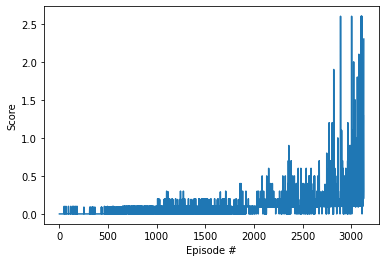

In [14]:
scores = mad3pg(max_episodes = 5000)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [15]:
env.close()